In [1]:
import os
from os import path
from collections import deque
import random
from random import shuffle
from tqdm import tqdm

import matplotlib.pyplot as plt

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from CustomDatasets import GameMemoryDataset,PlayerMemoryDataset

from CardGames import Hearts

CURRENT_DIR = path.abspath(path.curdir)

100%|████████████████████████████████████████████████████████████████████████████████| 395/395 [29:37<00:00,  4.50s/it]


Average points per game for the heuristic was:      3.346987341772152
Average points per game for the ai was:             6.933569620253165
Average points per game for the rando was:          7.859721518987342


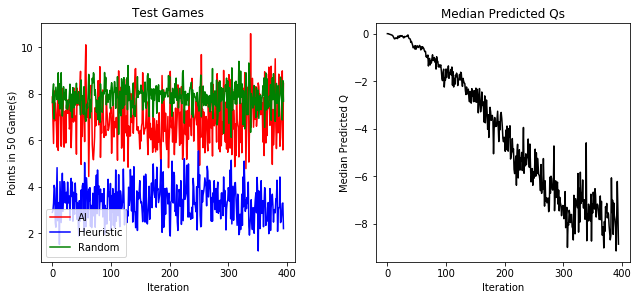

In [70]:
game = Hearts()

game.playerlist[0].model = "AI"
game.playerlist[2].model = "Heuristic"

GAME_BATCHES = 50


ai_points = 0
ai_list = []

h_points = 0
h_list = []

r_points = 0
r_list = []

median_qs = []

for i in range(6):
    game.play_round()

game_state, mask, memory = game.nnet_input()

game.reset()


for i in tqdm(range(len(os.listdir(CURRENT_DIR + '/Models/Lain/Versions/')))):
    
    game.playerlist[0].response_nnet.load_state_dict(torch.load(CURRENT_DIR + f'/Models/Lain/Versions/QNet {i+1}'))
#     game.strat_nnet.load_state_dict(torch.load(CURRENT_DIR + f'/Models/Gamma/GNet {i+1}'))
    
    with torch.no_grad():
        
        median_qs.append(torch.median((game.playerlist[0].response_nnet(game_state.unsqueeze(0),memory))))
    
    for _ in range(GAME_BATCHES):
    
        while not game.round_over:


            game.play_round()


        game.reset()


    for player in game.playerlist:



        if player.model=="AI":

            ai_points += player.points

        elif player.model=="Heuristic":

            h_points += player.points

        else:

            r_points += player.points

        player.points = 0

    ai_list.append(ai_points/(GAME_BATCHES))
    ai_points = 0

    h_list.append(h_points/(GAME_BATCHES))
    h_points = 0

    r_list.append(r_points/(2*GAME_BATCHES))
    r_points = 0
        
f,axarr = plt.subplots(1,2,figsize=(10,5))
f.tight_layout(pad=5)

ai, = axarr[0].plot(ai_list,"red",label='AI')
heuristic, = axarr[0].plot(h_list,"blue",label='Heuristic')
random, = axarr[0].plot(r_list,"green",label='Random')
axarr[0].title.set_text('Test Games')
axarr[0].set_ylabel(f'Points in {GAME_BATCHES} Game(s)')
axarr[0].set_xlabel('Iteration')
axarr[0].legend(handles=[ai, heuristic, random],loc="lower left")

axarr[1].plot(median_qs,"black")
axarr[1].title.set_text('Median Predicted Qs')
axarr[1].set_ylabel('Median Predicted Q')
axarr[1].set_xlabel('Iteration');

print(f'Average points per game for the heuristic was:      {np.mean(h_list)}')
print(f'Average points per game for the ai was:             {np.mean(ai_list)}')
print(f'Average points per game for the rando was:          {np.mean(r_list)}')

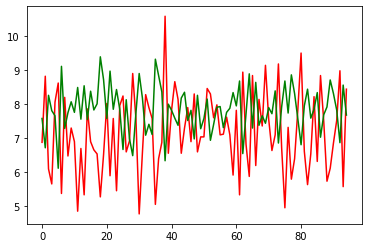

In [71]:
plt.plot(ai_list[300:],"red",label='AI')
# plt.plot(h_list[200:],"blue",label='Heuristic')
plt.plot(r_list[300:],"green",label='Random');

In [69]:
sample_game = Hearts()

# sample_game.strat_nnet.load_state_dict(torch.load(CURRENT_DIR + f'/Models/Gamma/GNet 1'))
sample_game.playerlist[0].response_nnet.load_state_dict(torch.load(CURRENT_DIR + f'/Models/Lain/Versions/QNet 1'))

for i in range(6):
    sample_game.play_round()

game_state, mask, memory = sample_game.nnet_input()

with torch.no_grad():
    
    

    print(sample_game.queen_of_spades_played)
    print('')
#
    np.set_printoptions(suppress=True)
    
    
    print(sample_game.playerlist[0].reserve[1,10])


#     print((sample_game.playerlist[0].response_nnet(game_state.unsqueeze(0),memory)).reshape((4,13)))
    
#     sample_game.strat_nnet.load_state_dict(torch.load(CURRENT_DIR + f'/Models/Gamma/GNet 340'))
#     print((sample_game.strat_nnet(game_state.unsqueeze(0),memory)).reshape((4,13)))
    
    
#     sample_game.playerlist[0].response_nnet.load_state_dict(torch.load(CURRENT_DIR + f'/Models/Lain/Versions/QNet 50'))
    
#     print('')
#     print(torch.median((sample_game.playerlist[0].response_nnet(game_state.unsqueeze(0),memory))))
#     print((sample_game.playerlist[0].response_nnet(game_state.unsqueeze(0),memory)).reshape((4,13)))

#     sample_game.strat_nnet.load_state_dict(torch.load(CURRENT_DIR + f'/Models/Gamma/GNet 150'))
    sample_game.playerlist[0].response_nnet.load_state_dict(torch.load(CURRENT_DIR + f'/Models/Lain/Versions/QNet 329'))
    
    print('')
    print(torch.median((sample_game.playerlist[0].response_nnet(game_state.unsqueeze(0),memory))))
    print((sample_game.playerlist[0].response_nnet(game_state.unsqueeze(0),memory)).reshape((4,13)))
    
    print('')
    game_state[1][7,13] = 1
    
    print(torch.median((sample_game.playerlist[0].response_nnet(game_state.unsqueeze(0),memory))))
    print((sample_game.playerlist[0].response_nnet(game_state.unsqueeze(0),memory)).reshape((4,13)))    

False

0.0

tensor(-6.5585)
tensor([[-6.2491, -6.5982, -5.8478, -6.4495, -6.3798, -6.1438, -6.6552, -6.6328,
         -6.6653, -6.4442, -6.3443, -6.6265, -6.5693],
        [-5.7961, -6.1682, -6.4250, -6.4121, -6.5585, -6.6363, -6.9013, -6.8680,
         -7.3722, -5.6389, -8.8646, -6.7921, -6.8222],
        [-6.0453, -6.1086, -6.8022, -6.6118, -6.4701, -6.6226, -7.3678, -7.3070,
         -7.1498, -8.2180, -7.9912, -8.0356, -6.7670],
        [ 1.3406, -6.4410, -6.1261, -6.7628, -6.2123, -6.2135, -6.4660, -6.4043,
         -6.5241, -6.5399, -6.5474, -7.0814, -6.0569]])

tensor(-5.8473)
tensor([[-5.5765, -5.8876, -5.1942, -5.7639, -5.6879, -5.5124, -5.9066, -5.9122,
         -5.9223, -5.7433, -5.6656, -5.9166, -5.8473],
        [-5.1844, -5.4927, -5.7356, -5.7280, -5.8577, -5.9019, -6.1448, -6.1239,
         -6.5577, -5.0337, -8.0130, -6.0118, -6.0478],
        [-5.4269, -5.4929, -6.0915, -5.9146, -5.7514, -5.9323, -6.5919, -6.5251,
         -6.3810, -7.3367, -7.1142, -7.1583, -6.0166],
  

In [2]:
game = Hearts()

np.set_printoptions(suppress=True)

game.playerlist[0].model = "AI"
game.playerlist[0].response_nnet.load_state_dict(torch.load(CURRENT_DIR + f'/Models/Silver/Versions/QNet 30'))

# for player in game.playerlist:
#     player.model = "AI"
#     player.response_nnet.load_state_dict(torch.load(CURRENT_DIR + f'/Models/Silver/Versions/QNet 365'))
    
while not game.round_over:
    
    game.play_round()

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.001      0.         0.24962747 0.         0.
  0.         0.         0.         0.         0.         0.
  0.77276294]]

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.         0.7555453  0.         0.03131856 0.         0.66545214
  0.         0.         0.         0.         0.43126116

In [3]:
game = Hearts()
game.playerlist[0].model = "AI"
game.playerlist[0].response_nnet.load_state_dict(torch.load(CURRENT_DIR + f'/Models/Lain/Versions/QNet 81'))

while not game.round_over:
    
    game.play_round()

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.16040645 0.
  0.         0.         0.13977791 0.         0.01424487 0.07548135
  0.001     ]]

[[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.         0.         0.         0.         0.         0.
  0.         0.02337315 0.28344226 0.         0.        

In [47]:
class Cuore2(nn.Module):
    def __init__(self):
        super(Cuore2, self).__init__()
        
        
        self.Conv1 = nn.Conv2d(6,128,5)
        self.Conv2 = nn.Conv2d(128,256,3)
        self.Conv3 = nn.Conv2d(256,256,3)

        self.bnorm1 = nn.BatchNorm2d(128)
        self.bnorm2 = nn.BatchNorm2d(256)
        self.bnorm3 = nn.BatchNorm1d(1600)
        self.bnorm4 = nn.BatchNorm1d(1000)
        self.bnorm5 = nn.BatchNorm1d(100)
     
        self.pool = nn.MaxPool2d(2,2)#,return_indices=True)

        self.fc1 = nn.Linear(6400,1600)
        self.fc2 = nn.Linear(1600,1000)
        self.fc3 = nn.Linear(1000,100)
        self.fc4 = nn.Linear(100,52)
     
        

    def forward(self, game_state, memory):
        
        x = self.Conv1(game_state)
        x = F.relu(self.bnorm1(x))
        x = self.Conv2(x)
        x = F.relu(self.bnorm2(x))
        x = self.pool(x)
        x = self.Conv3(x)

        x = x.view(-1,1,9216)

        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)

        
        return x
    
    def test(self,game_state):
        
        x = self.Conv1(game_state)
        x = F.relu(self.bnorm1(x))
        x = self.Conv2(x)
        x = F.relu(self.bnorm2(x))
        x = self.pool(x)
        x = self.Conv3(x)
        
        return x
        
        

In [48]:
game_state = torch.zeros((1,6,16,16))
agent = Cuore2()
print(agent.test(game_state).shape)

torch.Size([1, 256, 3, 3])
